In [1]:
import MoRIC_common_func as cf

In [2]:
directory = cf.format_path(r'C:\Users\Darren Wu\Desktop\SpaceInfos\2023\TW1Cont\MoRIC\Batch')
cf.enter_dir(directory)
p = cf.load_data_list('*.2CL')

File list loaded.


In [ ]:
# Find coordinates at the centre of every frame and reorganize into a single dataframe, saving as pickle file
df_centre = cf.pd.DataFrame(columns=['Longitude', 'Latitude'])
for path in p:
    coor = cf.read_pds(path)[1]
    #print(coor)
    coor_centre = coor.iloc[[int(1088/2)]]
    df_centre.loc[path] = [coor_centre['Longitude'].values[0], coor_centre['Latitude'].values[0]]
    print('Added ' + path + ' centre coordinates to list')

In [35]:
# Reading pickle stream of image coordinates
df_coor = cf.pd.read_pickle(r'C:\Users\Darren Wu\Desktop\SpaceInfos\2023\TW1Cont\MoRIC\Batch\coor_centre')

# Search for closest images in a defined radius around a POI (Point of Interest)
POI = 'Udzha'
search_radius = 150
coor_POI = '81.8N, 77.2E'

print(f'POI: {POI}')
df_POI = cf.gen_coor(coor_POI)
print(f'Within a search radius of {search_radius} km around {POI}:')
dist_closest = cf.find_closest_images(df_POI, df_coor, search_radius=search_radius)
for key in dist_closest:
    print(f'{key} => {dist_closest[key]:.2f} km')
dist_closest_list = list(dist_closest.keys())

POI: Udzha
Longitude: 77.2, Latitude: 81.8
Within a search radius of 150 km around Udzha:
HX1-Or_GRAS_MoRIC-F-0024_SCI_N_20211119084054_20211119084054_00593_A.2CL => 58.90 km
HX1-Or_GRAS_MoRIC-F-0023_SCI_N_20211119084032_20211119084032_00593_A.2CL => 60.32 km
HX1-Or_GRAS_MoRIC-F-0037_SCI_N_20211129233336_20211129233336_00629_A.2CL => 63.18 km
HX1-Or_GRAS_MoRIC-F-0036_SCI_N_20211129233306_20211129233306_00629_A.2CL => 73.70 km
HX1-Or_GRAS_MoRIC-F-0034_SCI_N_20211123185437_20211123185437_00608_A.2CL => 134.22 km
HX1-Or_GRAS_MoRIC-F-0025_SCI_N_20211119084117_20211119084117_00593_A.2CL => 140.07 km
HX1-Or_GRAS_MoRIC-F-0033_SCI_N_20211123185412_20211123185412_00608_A.2CL => 141.69 km
HX1-Or_GRAS_MoRIC-F-0032_SCI_N_20211116170222_20211116170222_00584_A.2CL => 141.84 km
HX1-Or_GRAS_MoRIC-F-0022_SCI_N_20211119084009_20211119084009_00593_A.2CL => 141.94 km
HX1-Or_GRAS_MoRIC-F-0033_SCI_N_20211116170247_20211116170247_00584_A.2CL => 145.68 km


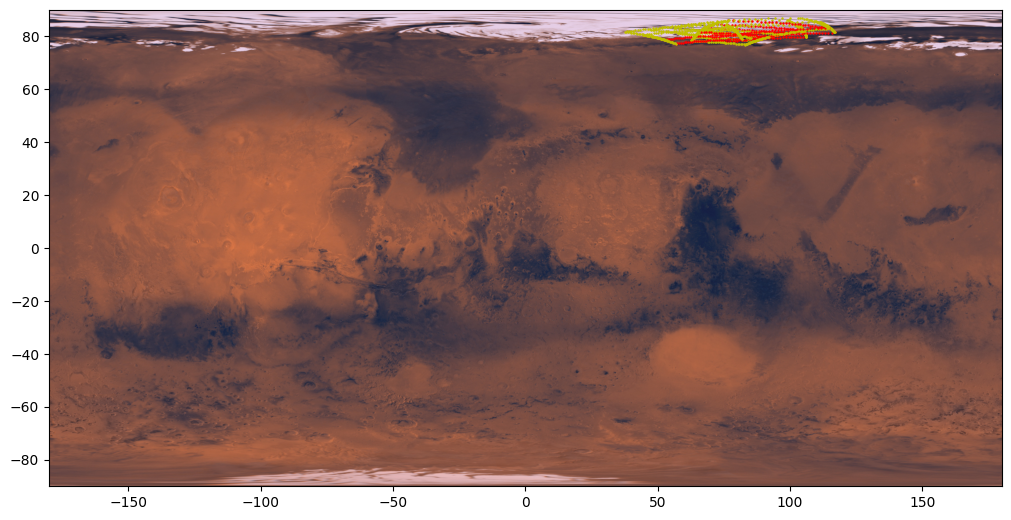

In [36]:
# Preview boundaries associated with the closest images
layout = [['Map']]
gs_kw = dict(width_ratios=[1], height_ratios=[1])
path_map = cf.format_path(r'C:\Users\Darren Wu\Desktop\SpaceInfos\2023\TW1Cont\MoRIC\Batch\Mars_Viking_ClrMosaic_global_925m-2.jpg')

fig_map, axes = cf.create_plot_layout(layout, gs_kw, figsize=(10, 10))
cf.plot_base_map(axes['Map'], path_map)
for path in dist_closest:
    coor = cf.read_pds(path)[1]
    #print(coor)
    upper, other = cf.prune_coor(coor)
    #print('Plotting ' + path)
    cf.plot_coor(axes['Map'], upper, other)

cf.plt.show()
#cf.plt.close()

In [37]:
cf.export_image_list(dist_closest_list, POI)

Creating subfolder POI Batch - Udzha
Processing and exporting file (1) HX1-Or_GRAS_MoRIC-F-0024_SCI_N_20211119084054_20211119084054_00593_A
DONE
Processing and exporting file (2) HX1-Or_GRAS_MoRIC-F-0023_SCI_N_20211119084032_20211119084032_00593_A
DONE
Processing and exporting file (3) HX1-Or_GRAS_MoRIC-F-0037_SCI_N_20211129233336_20211129233336_00629_A
DONE
Processing and exporting file (4) HX1-Or_GRAS_MoRIC-F-0036_SCI_N_20211129233306_20211129233306_00629_A
DONE
Processing and exporting file (5) HX1-Or_GRAS_MoRIC-F-0034_SCI_N_20211123185437_20211123185437_00608_A
DONE
Processing and exporting file (6) HX1-Or_GRAS_MoRIC-F-0025_SCI_N_20211119084117_20211119084117_00593_A
DONE
Processing and exporting file (7) HX1-Or_GRAS_MoRIC-F-0033_SCI_N_20211123185412_20211123185412_00608_A
DONE
Processing and exporting file (8) HX1-Or_GRAS_MoRIC-F-0032_SCI_N_20211116170222_20211116170222_00584_A
DONE
Processing and exporting file (9) HX1-Or_GRAS_MoRIC-F-0022_SCI_N_20211119084009_20211119084009_0059